## Aufgabe 2 — Abtastung und Quantisierung

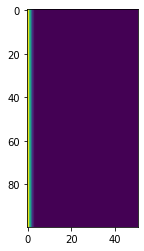

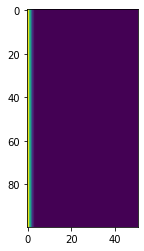

In [16]:
import math
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

def gaussian_function(x: int, y = 0.0, o = 1.0) -> float:

    const = 1 / (math.sqrt(2 * math.pi * o ** 2))
    val = const * math.exp(-(((x - y)**2) / (2 * o ** 2)))

    if val < -5: return -5
    if val >  5: return  5

    return val

def scale(image: np.ndarray) -> np.ndarray:

    gm = image - np.full(image.shape, np.min(image))
    gs = 0xff * (gm / np.max(gm))

    return gs

row = [gaussian_function(x) for x in range(0, 51)]
rows = row * 100
matrix = np.array(rows)
matrix = matrix.reshape((100, 51))

plt.figure()
plt.imshow(matrix)
plt.figure()
plt.imshow(scale(matrix))

## Aufgabe 5 — Rauschen

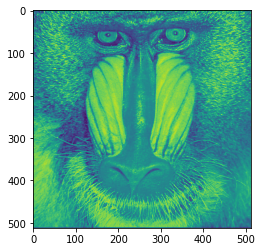

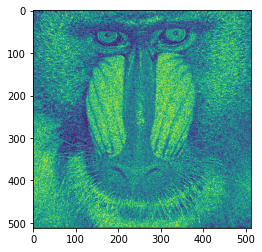

In [8]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

def gaussian_noise(image: np.ndarray, standard_deviation = 50):

    mean = 0
    noise = np.random.normal(mean, standard_deviation, image.shape)

    noise_image = image + np.array(noise)
    noise_image = np.clip(noise_image, a_min = 0, a_max = 0xff)

    plt.figure()
    plt.imshow(image)

    plt.figure()
    plt.imshow(noise_image)


mandrill = skimage.io.imread("mandrill.png")
gaussian_noise(mandrill)

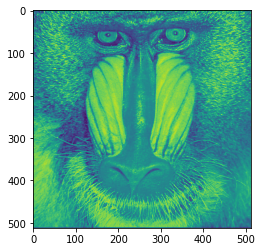

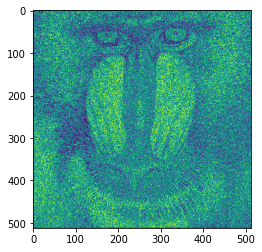

In [9]:
def salt_and_pepper_noise(image: np.ndarray, probability = 0.3):

    noise = np.random.choice(3, image.shape, p=[1 - probability, probability / 2, probability / 2])
    noise = np.where(noise==1,  0xff, noise)
    noise = np.where(noise==2, -0xff, noise)

    noise_image = image + noise
    noise_image = np.clip(noise_image, a_min = 0, a_max = 0xff)

    plt.figure()
    plt.imshow(image)

    plt.figure()
    plt.imshow(noise_image)


mandrill = skimage.io.imread("mandrill.png")
salt_and_pepper_noise(mandrill)


**Beschreibt kurz, welche Auswirkungen die Veränderung der jeweiligen Parameter der beiden Funktionen
(Standardabweichung bzw. Wahrscheinlichkeit für eine Veränderung) auf das Ergebnis hat.**

Je höher die Wahrscheinlichkeit ist desso höher ist das Rauschen im Bild.
Sest man bei salt_and_pepper_noise die probability 1 ist garnichts mehr zu erkennen.

